# Sales Forecasting - Time Series Analysis
### Data: https://www.kaggle.com/code/imkushwaha/project-forecasting-the-furniture-sales/data

In [67]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [68]:
df = pd.read_csv('data.csv', encoding='unicode_escape')

In [69]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [70]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [71]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [72]:
col = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

In [73]:
df.drop(columns=col, axis=1, inplace=True)

In [74]:
df = df.sort_values('Order Date')
df.head(2)

,Order Date,Sales
845,1/1/2017,474.43
1707,1/1/2017,141.42


In [75]:
df = df.groupby('Order Date')['Sales'].sum().reset_index()

In [76]:
df.head(2)

,Order Date,Sales
0,1/1/2017,975.49
1,1/10/2014,51.94


In [77]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  889 non-null    datetime64[ns]
 1   Sales       889 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.0 KB


In [78]:
df = df.set_index('Order Date')
df.head(2)

,Sales
Order Date,
2017-01-01,975.49
2014-01-10,51.94


In [79]:
mean_all = df['Sales'].resample('MS').mean()

In [80]:
print(mean_all)

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

In [81]:
df = pd.DataFrame({'Date': mean_all.index, 'Sales': mean_all.values})

In [82]:
df.info()
df.tail(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    48 non-null     datetime64[ns]
 1   Sales   48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 896.0 bytes


,Date,Sales
46,2017-11-01,1277.817759
47,2017-12-01,1256.298672


In [83]:
df.set_index('Date', inplace = True)
df.index.freq = 'MS'
df.head()

,Sales
Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188


<AxesSubplot:xlabel='Date'>

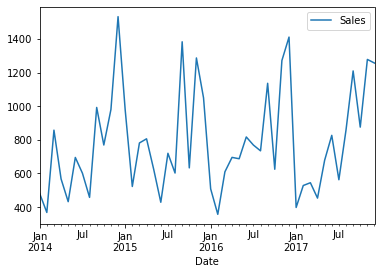

In [84]:
df.plot()

### In order to check the seasonality of the data we will perform Augmented Dickey-Fuller Test

#### H0 (Null Hypothesis) : Series is non statitonary in nature
#### HA (Alternate Hypothesis) : Series is stationary in nature

In [85]:
from statsmodels.tsa.stattools import adfuller

In [86]:
test_result = adfuller(df['Sales'])

In [87]:
print(test_result)

(-5.191070187339274, 9.1687566556655e-06, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, 521.9616303121272)


#### If p(value) < 0.05 we reject H0 (Date is stationary) 
#### if p(value) > 0.05 we accept H0 (Data is not stationary)

In [88]:
def adfuller_test(Sales):
    result = adfuller(Sales)
    label = ['ADF Test Statistic', 'P Value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, label):
        print(label+ ':' + str(value))
    if result[1]< 0.05:
        print("Reject the null hypothesis, data is stationary")
    else: 
        
         print("Accept the null hypothesis, data is non-stationary")

In [89]:
adfuller_test(df['Sales'])

ADF Test Statistic:-5.191070187339274
P Value:9.1687566556655e-06
#Lags Used:10
Number of Observations Used:37
Reject the null hypothesis, data is stationary


## Identifying the p,q,r values in the Auto Regressive Model 
### pacf -> value of p 
### acf   -> value of q 

In [90]:
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

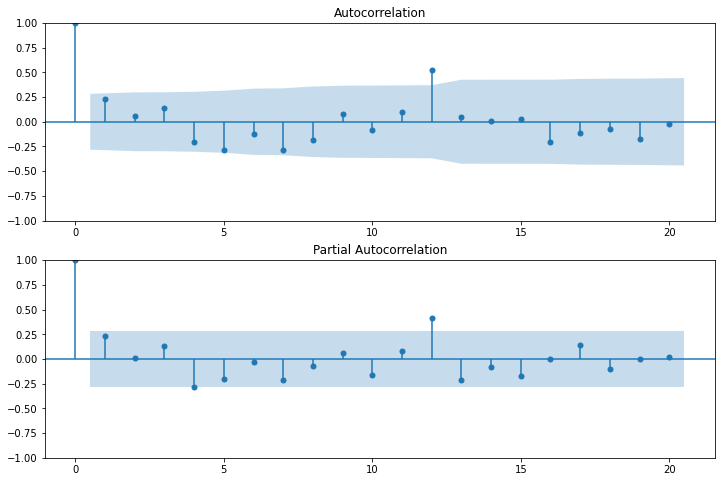

In [91]:
warnings.filterwarnings('ignore', message="The default method 'yw' can produce PACF values outside of the [-1,1] interval.")
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Sales'].dropna(), lags = 20, ax= ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Sales'].dropna(), lags = 20, ax= ax2, method='ywm')

#### Taking p =1, d = 1(seasonal difference) , q = 0

In [92]:
import statsmodels.api as sm

In [93]:
model = sm.tsa.ARIMA(df['Sales'], order=(1, 1, 0))
model_fit = model.fit()

In [94]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -340.488
Date:                Mon, 24 Jul 2023   AIC                            684.977
Time:                        14:04:50   BIC                            688.677
Sample:                    01-01-2014   HQIC                           686.369
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4072      0.135     -3.024      0.002      -0.671      -0.143
sigma2      1.167e+05   2.29e+04      5.092      0.000    7.18e+04    1.62e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.16   Jarque-Bera (JB):                 2.09
Prob(Q):                              0.28   Prob(JB):                         0.35
Heteroskedasticity (H):               1.32   Skew:                            -0.47
Prob(H) (two-sided):                  0.58   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predicting ARIMA Model 
### Data Exhibiting strong seasonal patterns, hence ARIMA is not a good fit for predicting the results. In order to have better results we will train SARIMAX model and predict the values. 

<AxesSubplot:xlabel='Date'>

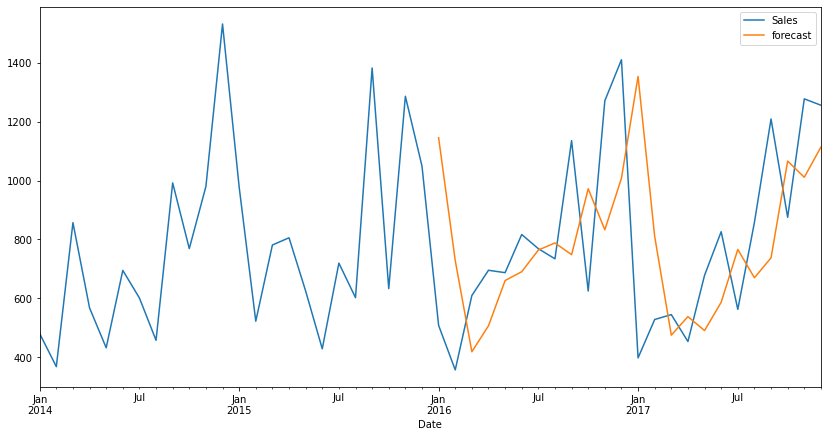

In [95]:
df['forecast'] = model_fit.predict(start=pd.to_datetime('2016-01-01'), dynamic = False)
df[['Sales', 'forecast']].plot(figsize = (14,7))

In [96]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order = (1,1,0), seasonal_order = (1,1,0,12))
results = model.fit()

# Predicting the results of SARIMAX 
### Improved Data Fitting

<AxesSubplot:xlabel='Date'>

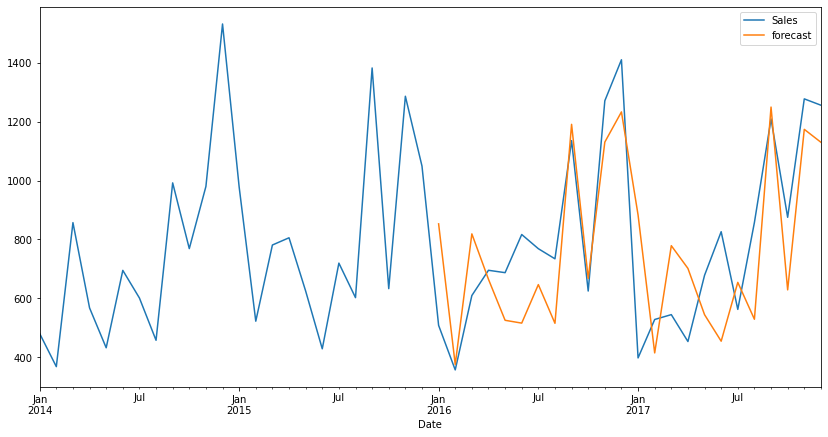

In [97]:
df['forecast'] = results.predict(start=pd.to_datetime('2016-01-01'), dynamic = True)
df[['Sales','forecast']].plot(figsize = (14,7))

# Forecasting Future Sales from Historical Data (2018-2020)

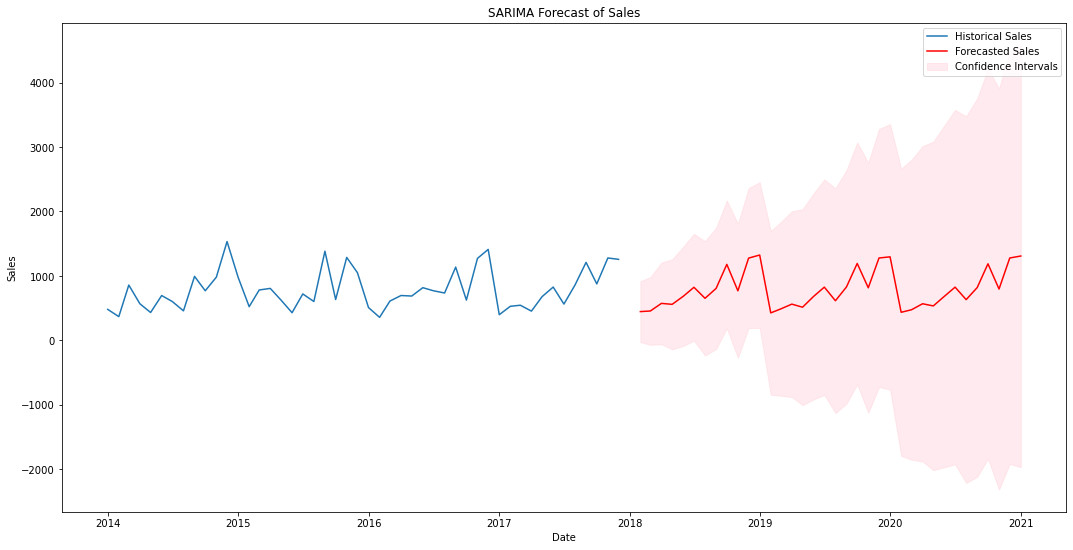

In [98]:
# Number of periods to forecast into the future (months)
forecast_periods = 36

# Make predictions for the future sales
forecast = results.get_forecast(steps=forecast_periods)

forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Generating date range for the future predictions
future_dates = pd.date_range(start=df.index[-1], periods=forecast_periods + 1, freq='M')[1:]

# Plotting the historical sales and the forecasted sales
plt.figure(figsize=(18, 9))
plt.plot(df.index, df['Sales'], label='Historical Sales')
plt.plot(future_dates, forecast_values, label='Forecasted Sales', color='r')
plt.fill_between(future_dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink',
                 alpha=0.3, label='Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('SARIMA Forecast of Sales')
plt.legend()
plt.show()


In [99]:
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted Sales': forecast_values})

In [100]:
forecast_df.drop(columns=['Date'], inplace=True)

In [101]:
print(forecast_df)

            Forecasted Sales
2018-01-01        445.791734
2018-02-01        455.285005
2018-03-01        573.360587
2018-04-01        558.404676
2018-05-01        682.936039
2018-06-01        823.141935
2018-07-01        652.146661
2018-08-01        805.434860
2018-09-01       1178.607167
2018-10-01        768.237544
2018-11-01       1275.816910
2018-12-01       1323.612749
2019-01-01        425.819003
2019-02-01        487.476670
2019-03-01        561.789228
2019-04-01        513.911565
2019-05-01        681.727656
2019-06-01        825.359384
2019-07-01        614.324611
2019-08-01        828.817402
2019-09-01       1192.707656
2019-10-01        815.175950
2019-11-01       1277.466762
2019-12-01       1295.401079
2020-01-01        435.211312
2020-02-01        474.396065
2020-03-01        567.562146
2020-04-01        533.867484
2020-05-01        683.036107
2020-06-01        825.191954
2020-07-01        631.406574
2020-08-01        819.531851
2020-09-01       1187.420900
2020-10-01    